In [1]:
# UPS Aircraft Incident Analysis
# Author: Diana Zamora"
# GitHub Repo: https://github.com/DrZamora01/FlightRisk-UPSAnalysis

import pandas as pd
import matplotlib.pyplot as plt

print("Notebook Initialized")



Notebook Initialized


In [4]:
airbus_df = pd.read_csv("Data/AIDS_REPORTS AirBus.csv")
boeings_df = pd.read_csv("Data/AIDS_REPORTS Boeings.csv")
md11_df = pd.read_csv("Data/AIDS_REPORTS MD_11.csv")


In [5]:
airbus_ups = airbus_df[airbus_df['Operator'] == "UNITED PARCEL SERVICE CO"]
boeings_ups = boeings_df[boeings_df['Operator'] == "UNITED PARCEL SERVICE CO"]
md11_ups = md11_df[md11_df['Operator'] == "UNITED PARCEL SERVICE CO"]


In [6]:
combined_df = pd.concat([airbus_ups, boeings_ups, md11_ups], ignore_index=True)


In [7]:
# Drop columns that are empty or irrelevant
columns_to_drop = [' ', ' .1']
combined_df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')


In [8]:
combined_df.to_excel("UPS_Incidents_Cleaned.xlsx", index=False)


In [9]:
# Summary of numerical columns
combined_df.describe()


,Total Fatalities,Total Injuries,Nbr of Engines,PIC Flight Time Total Hrs,PIC Flight Time Total Make-Model
count,85.0,85.0,65.000000,41.000000,40.000000
mean,0.0,0.0,2.707692,8221.707317,1949.650000
std,0.0,0.0,0.722908,5004.356338,2225.926895
min,0.0,0.0,2.000000,0.000000,0.000000
25%,0.0,0.0,2.000000,5446.000000,200.000000
50%,0.0,0.0,3.000000,9250.000000,802.500000
75%,0.0,0.0,3.000000,10800.000000,3200.000000
max,0.0,0.0,4.000000,19150.000000,8000.000000


In [10]:
# Count of incidents by Aircraft Model
combined_df['Aircraft Model'].value_counts()


Aircraft Model
727     23
757     19
MD11    12
767     11
A300    10
747     10
Name: count, dtype: int64

In [11]:
# Count by Aircraft Damage level
combined_df['Aircraft Damage'].value_counts()


Aircraft Damage
MINOR          39
NONE           13
SUBSTANTIAL     4
Name: count, dtype: int64

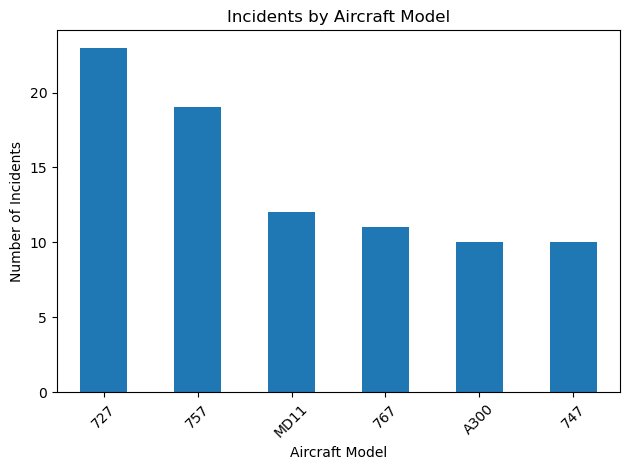

In [12]:
import matplotlib.pyplot as plt

combined_df['Aircraft Model'].value_counts().plot(kind='bar', title='Incidents by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


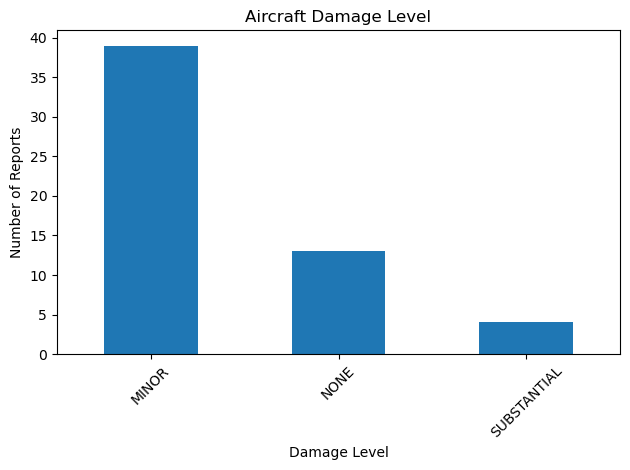

In [13]:
combined_df['Aircraft Damage'].value_counts().plot(kind='bar', title='Aircraft Damage Level')
plt.xlabel('Damage Level')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


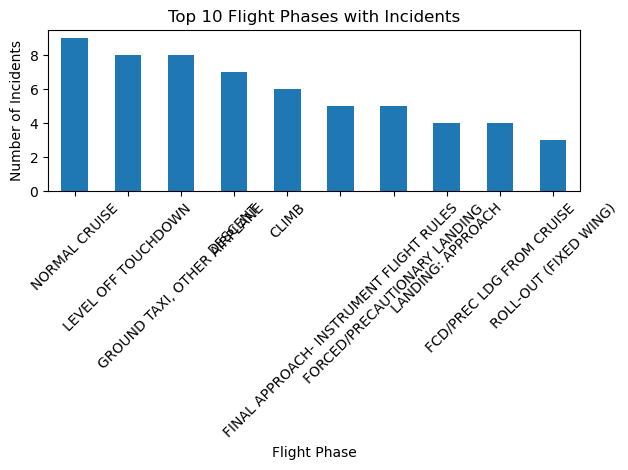

In [14]:
combined_df['Flight Phase'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Flight Phases with Incidents')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


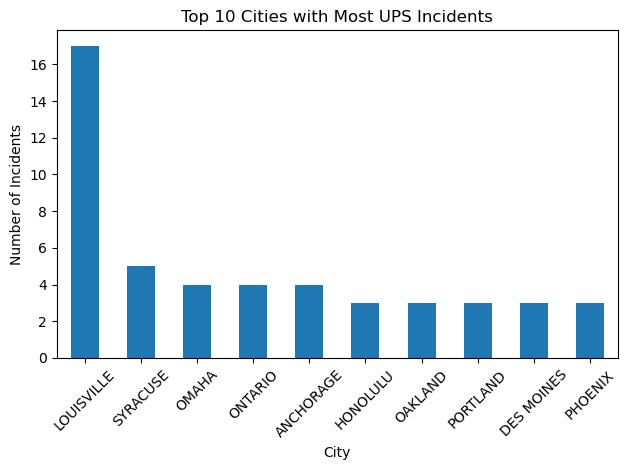

In [15]:
combined_df['Event City'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Cities with Most UPS Incidents')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


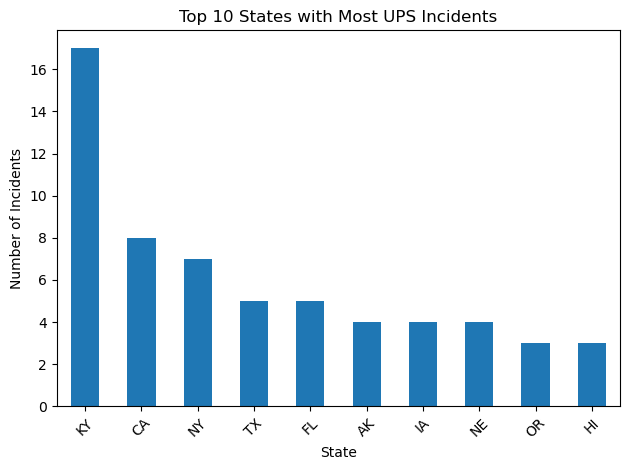

In [16]:
combined_df['Event State'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 States with Most UPS Incidents')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



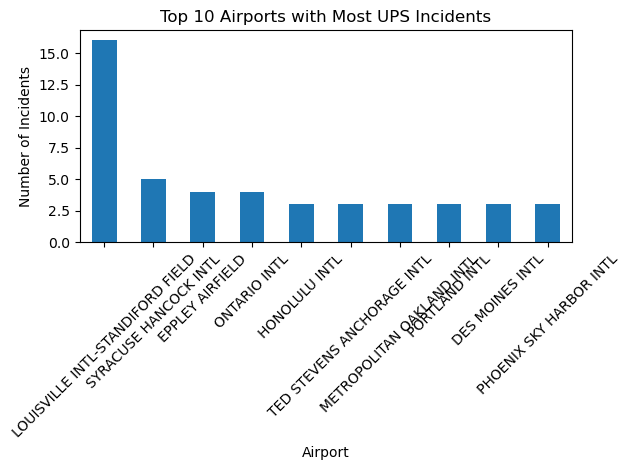

In [17]:
combined_df['Event Airport'].value_counts().nlargest(10).plot(kind='bar', title='Top 10 Airports with Most UPS Incidents')
plt.xlabel('Airport')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
print(combined_df.columns)


Index(['AIDS Report Number', 'Local Event Date', 'Event City', 'Event State',
       'Event Airport', 'Event Type', 'Aircraft Damage', 'Flight Phase',
       'Aircraft Make', 'Aircraft Model', 'Aircraft Series', 'Operator',
       'Primary Flight Type', 'Flight Conduct Code', 'Flight Plan Filed Code',
       'Aircraft Registration Nbr', 'Total Fatalities', 'Total Injuries',
       'Aircraft Engine Make', 'Aircraft Engine Model', 'Engine Group Code',
       'Nbr of Engines', 'PIC Certificate Type', 'PIC Flight Time Total Hrs',
       'PIC Flight Time Total Make-Model'],
      dtype='object')


In [21]:
def bucket_hours(hours):
    if pd.isna(hours):
        return 'Unknown'
    elif hours < 1000:
        return '<1k hrs'
    elif hours < 5000:
        return '1k–5k hrs'
    elif hours < 10000:
        return '5k–10k hrs'
    else:
        return '10k+ hrs'

combined_df['Pilot Experience'] = combined_df['PIC Flight Time Total Hrs'].apply(bucket_hours)


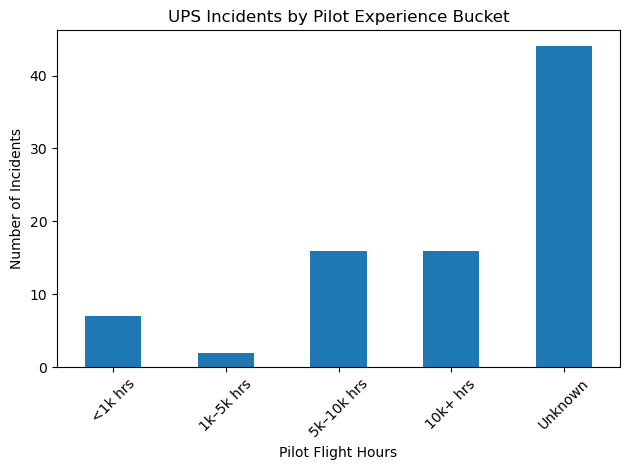

In [22]:
combined_df['Pilot Experience'].value_counts().reindex(
    ['<1k hrs', '1k–5k hrs', '5k–10k hrs', '10k+ hrs', 'Unknown']
).plot(kind='bar', title='UPS Incidents by Pilot Experience Bucket')

plt.xlabel('Pilot Flight Hours')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


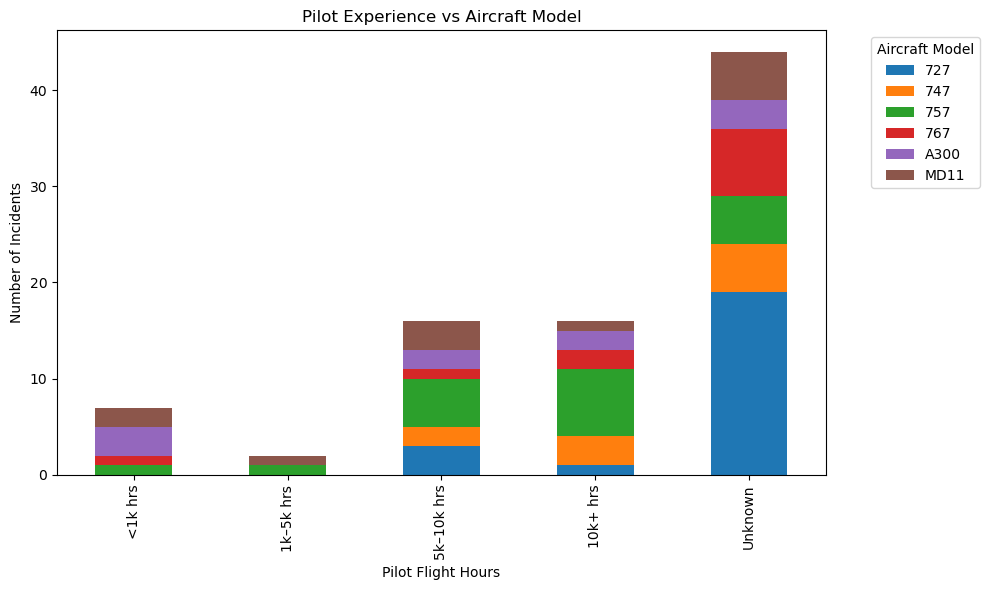

In [23]:
pilot_model_ct = pd.crosstab(combined_df['Pilot Experience'], combined_df['Aircraft Model'])

pilot_model_ct.reindex(['<1k hrs', '1k–5k hrs', '5k–10k hrs', '10k+ hrs', 'Unknown']).plot(
    kind='bar', stacked=True, figsize=(10, 6), title='Pilot Experience vs Aircraft Model'
)

plt.xlabel('Pilot Flight Hours')
plt.ylabel('Number of Incidents')
plt.legend(title='Aircraft Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
